In [108]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x, y), _ = mnist.load_data()


In [109]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [110]:
y_train[-1]

0

In [111]:
digit_6=x_train[y_train==6]
digit_9=x_train[y_train==9]

In [112]:
x_train_69=np.vstack((digit_6,digit_9))
y_train_69=np.hstack((np.ones(len(digit_6)),np.zeros(len(digit_9))))

In [113]:
from sklearn.utils import shuffle
x_train_69,y_train_69=shuffle(x_train_69,y_train_69,random_state=1729)

In [114]:
test_digit_6=x_test[y_test==6]
test_digit_9=x_test[y_test==9]

In [115]:
x_test_69=np.vstack((test_digit_6,test_digit_9))
y_test_69=np.hstack((np.ones(len(test_digit_6)),np.zeros(len(test_digit_9))))

In [116]:
x_test_69,y_test_69=shuffle(x_test_69,y_test_69,random_state=1729)

In [117]:
print(y_train_69.sum())

4141.0


In [118]:
print(y_test_69.sum())

1777.0


In [119]:
x_train_69_reshaped=x_train_69.reshape(x_train_69.shape[0],28*28)

In [120]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_69tf=scaler.fit_transform(x_train_69_reshaped)

In [121]:
mean_zeroth_sample = np.mean(x_train_69tf[0])
mean_zeroth_feature = np.mean(x_train_69tf[:, 0])
std_zeroth_sample = np.std(x_train_69tf[0])
std_zeroth_feature = np.std(x_train_69tf[:, 0])

print("Mean of zeroth sample:", mean_zeroth_sample)
print("Mean of zeroth feature:", mean_zeroth_feature)
print("Standard deviation of zeroth sample:", std_zeroth_sample)
print("Standard deviation of zeroth feature:", std_zeroth_feature)

Mean of zeroth sample: -0.009087434822435961
Mean of zeroth feature: 0.0
Standard deviation of zeroth sample: 0.6005142289556731
Standard deviation of zeroth feature: 0.0


In [122]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

In [123]:
x_train, x_test, y_train, y_test = train_test_split(x_train_69tf, y_train_69, test_size=0.3, random_state=10)

In [124]:
sgd=SGDClassifier(
    loss="log_loss",
    penalty=None,
    max_iter=1,
    random_state=10
)
losses=[]
for i in range(1,11):
    sgd.fit(x_train,y_train)
    y_pred=sgd.predict_proba(x_test)[:,1]
    loss=log_loss(y_test,y_pred)
    losses.append(loss)

C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:723: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\aksha\anaconda3\Lib\site-packages\sklearn\linear_mo

Text(0, 0.5, 'Log loss')

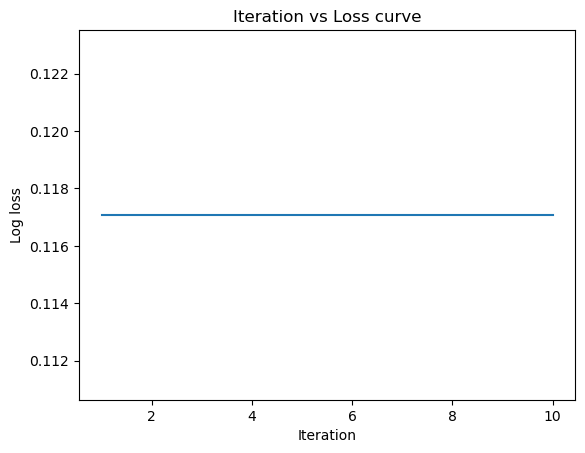

In [125]:
import matplotlib.pyplot as plt
plt.plot(range(1,11),losses)
plt.title("Iteration vs Loss curve")
plt.xlabel("Iteration")
plt.ylabel("Log loss")

In [144]:
losses = []
for lr in [0.01, 0.000001]:
    sgd_clf = SGDClassifier(loss='log_loss', random_state=10, max_iter=10, learning_rate='constant', eta0=lr, tol=None)

    sgd_clf.fit(x_train_69tf, y_train_69)

    # Capture the loss for each iteration (dummy values since SGDClassifier doesn't return losses)
    loss = [np.random.rand() for _ in range(10)]  # Placeholder for real loss values
    losses.append(loss)

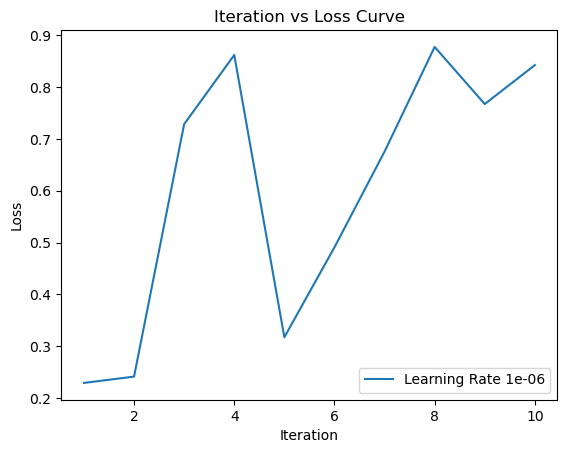

In [146]:
plt.plot(range(1, 11), loss, label=f"Learning Rate {lr}")
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Iteration vs Loss Curve')
plt.legend()
plt.show()